In [9]:
import tensorflow as tf 
import numpy as np
import os
import pandas as pd
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.preprocessing.image import img_to_array, load_img
#import tensorflow_datasets as tfds
from tensorflow.keras.optimizers import Adam, RMSprop, Adamax
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
os.getcwd()

'd:\\Training\\C-DAC Sessions\\DBDA-Dec-25\\TensorFlow'

In [11]:
train_dir = "D:/Training/C-DAC Sessions/DBDA-Dec-25/cat_dogs/train"
validation_dir = "D:/Training/C-DAC Sessions/DBDA-Dec-25/cat_dogs/val"
train_datagen = ImageDataGenerator( rescale = 1.0/255., 
                                    shear_range = 0.2, 
                                    zoom_range = 0.2, 
                                    horizontal_flip = True )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
train_generator = train_datagen.flow_from_directory( train_dir, 
                    target_size = (150,150), batch_size = 32, class_mode = 'binary' )
validation_generator = test_datagen.flow_from_directory( validation_dir, 
                    target_size = (150,150), batch_size = 32, class_mode = 'binary' )

Found 280 images belonging to 2 classes.
Found 65 images belonging to 2 classes.


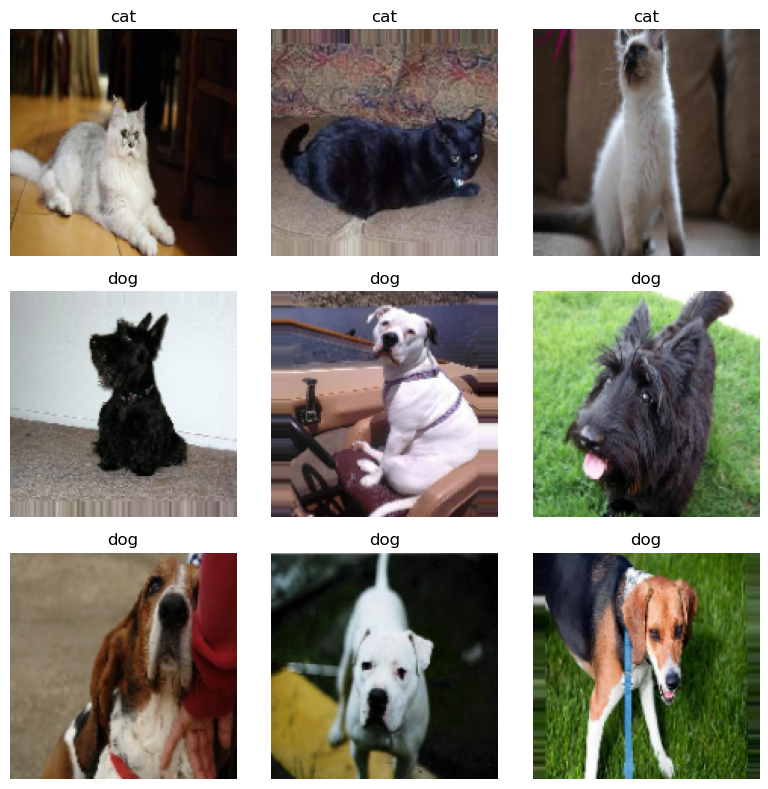

In [12]:
# show a few images from train_generator
batch = next(train_generator)  # (images, labels)
images, labels = batch[0], batch[1]
idx_to_class = {v: k for k, v in train_generator.class_indices.items()}

n = 9
n = min(n, images.shape[0])
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(8, 8))
for i in range(n):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[i])
    lbl = labels[i]
    # handle scalar or one-hot label
    if hasattr(lbl, "__len__") and len(lbl) > 1:
        lbl = np.argmax(lbl)
    plt.title(idx_to_class.get(int(lbl), str(lbl)))
    plt.axis("off")
plt.tight_layout()
plt.show()

In [13]:
tf.random.set_seed(25)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(150,150,3)),   
    tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),   
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),   
    tf.keras.layers.Dense(1, activation='sigmoid')
])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 36, 36, 32)       128       
 hNormalization)                                                 
                                                      

In [14]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=2,restore_best_weights=True)
model.compile(optimizer=Adamax(lr=0.001), loss='binary_crossentropy',  metrics = ['acc'])
history = model.fit(train_generator,  validation_data=validation_generator, epochs=100,
                              verbose=2, callbacks=[monitor])

Epoch 1/100
9/9 - 6s - loss: 1.5354 - acc: 0.5714 - val_loss: 0.8086 - val_acc: 0.6308 - 6s/epoch - 682ms/step
Epoch 2/100
9/9 - 4s - loss: 0.5736 - acc: 0.7393 - val_loss: 0.6095 - val_acc: 0.6308 - 4s/epoch - 481ms/step
Epoch 3/100
9/9 - 5s - loss: 0.4237 - acc: 0.8143 - val_loss: 0.6024 - val_acc: 0.6615 - 5s/epoch - 511ms/step
Epoch 4/100
9/9 - 4s - loss: 0.3246 - acc: 0.8714 - val_loss: 0.6279 - val_acc: 0.6769 - 4s/epoch - 495ms/step
Epoch 5/100
9/9 - 5s - loss: 0.2690 - acc: 0.9036 - val_loss: 0.6690 - val_acc: 0.6462 - 5s/epoch - 509ms/step
Epoch 6/100
9/9 - 5s - loss: 0.2071 - acc: 0.9071 - val_loss: 0.7258 - val_acc: 0.6308 - 5s/epoch - 518ms/step
Epoch 7/100
9/9 - 5s - loss: 0.1305 - acc: 0.9571 - val_loss: 0.8210 - val_acc: 0.6308 - 5s/epoch - 530ms/step
Epoch 8/100
Restoring model weights from the end of the best epoch: 3.
9/9 - 4s - loss: 0.1813 - acc: 0.9321 - val_loss: 0.7585 - val_acc: 0.6462 - 4s/epoch - 492ms/step
Epoch 8: early stopping


In [16]:
logloss, acc = model.evaluate(validation_generator)
print(f"Validation Log Loss: {logloss}, Validation Accuracy: {acc}")

3/3 [==============================] - 0s 72ms/step - loss: 0.6024 - acc: 0.6615
Validation Log Loss: 0.6024128198623657, Validation Accuracy: 0.6615384817123413
